In [ ]:
vda  = np.loadtxt('samplesVDA1.txt',int)
cant_datos = vda.shape[0]
medidas_x_segundo = 400
npyarray=vda.reshape(-1, 1)
print(npyarray)

ACTIVIDAD 1 -Sugeno-
Cargar el conjunto de datos de alguna de las señales de VDA que se ofrecen a continuación y graficarlo.
Entrenar diferentes modelos de Sugeno con todos ellos, variando la cantidad de reglas R (O el parámetro de radio de vecindad del clustering sustractivo, si corresponde). Graficar el error cuadrático medio (MSE) vs. R.
Elegir uno de los modelos según la mejor relación entre R y el MSE obtenido.
Sobremuestrear la señal, barriendo la variable de entrada para tener muchos más valores de muestras que con los datos originales y utilizando el modelo de Sugeno seleccionado.

Nota: Las señales de Variación de Diámetro Arterial fueron muestreadas con una frecuencia de 400 Hz. Es posible graduar así un eje temporal en segundos. El intervalo entre muestras sería de 1/400 s = 2.5ms.

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

In [165]:
vda  = np.loadtxt('samplesVDA1.txt',int)
cant_datos = vda.shape[0]
medidas_x_segundo = 400
npyarray=np.array
tiempo = np.arange(0,cant_datos/400,1/medidas_x_segundo)
tiempo = tiempo*1000


vda = vda.reshape(-1,1)
tiempo = tiempo.reshape(-1,1)
data = np.hstack((vda,tiempo))

array([[421. ,   0. ],
       [424. ,   2.5],
       [431. ,   5. ],
       [440. ,   7.5],
       [455. ,  10. ],
       [474. ,  12.5],
       [495. ,  15. ],
       [518. ,  17.5],
       [542. ,  20. ],
       [565. ,  22.5],
       [587. ,  25. ],
       [608. ,  27.5],
       [627. ,  30. ],
       [645. ,  32.5],
       [659. ,  35. ],
       [669. ,  37.5],
       [675. ,  40. ],
       [679. ,  42.5],
       [678. ,  45. ],
       [674. ,  47.5],
       [669. ,  50. ],
       [662. ,  52.5],
       [652. ,  55. ],
       [644. ,  57.5],
       [635. ,  60. ],
       [624. ,  62.5],
       [615. ,  65. ],
       [606. ,  67.5],
       [597. ,  70. ],
       [589. ,  72.5],
       [582. ,  75. ],
       [575. ,  77.5],
       [570. ,  80. ],
       [566. ,  82.5],
       [562. ,  85. ],
       [560. ,  87.5],
       [559. ,  90. ],
       [558. ,  92.5],
       [560. ,  95. ],
       [560. ,  97.5],
       [563. , 100. ],
       [565. , 102.5],
       [568. , 105. ],
       [571

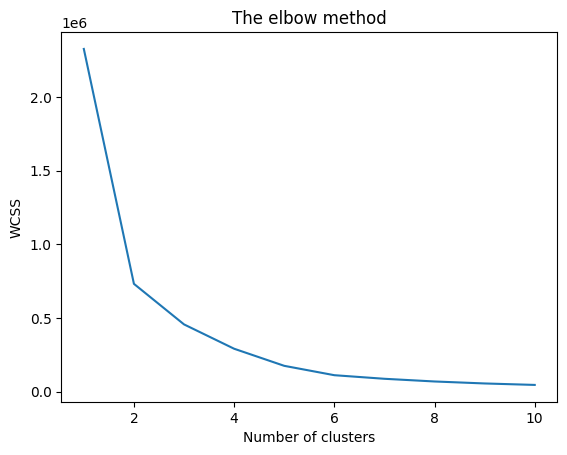

In [172]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
    

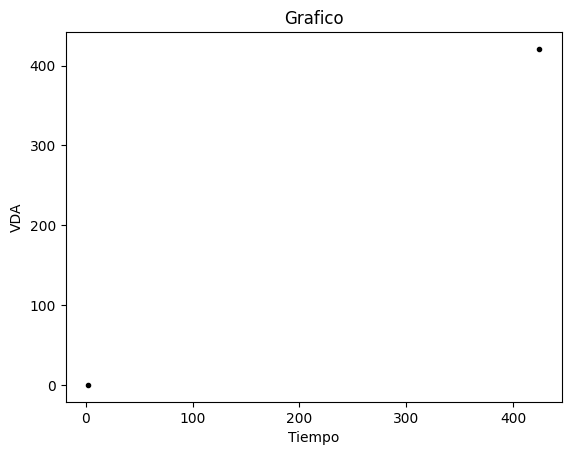

In [179]:
tiempoX = np.linspace(0, 375, 151)  # Universo de (x) entrada
plt.figure()
plt.plot(data[0],data[1],'.k')
plt.xlabel("Tiempo")
plt.ylabel("VDA")
#plt.scatter(tiempo,vda)

plt.title("Grafico")
plt.show()


########################################################################################          
## Definir el intervalo de tiempo en milisegundos (2.5 milisegundos = 0.0025 segundos)
intervalo_milisegundos = 2.5

# Calcular el número total de puntos que deseas en el vector
numero_de_puntos = 151  # Por ejemplo, para obtener 151 puntos equiespaciados

# Crear un vector con puntos equiespaciados cada 2.5 milisegundos
vector_tiempo = np.arange(0, numero_de_puntos * intervalo_milisegundos, intervalo_milisegundos)
#########################################################################################


In [ ]:

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [145]:
"""Subtractive Clustering Algorithm
"""

def subclust3(data, Ra, Rb, AcceptRatio=0.3, RejectRatio=0.1):
    if Rb==0:
        Rb = Ra*1.15
        
    scaler = MinMaxScaler()
    scaler.fit(data) 
    ndata = scaler.transform(data)
    
    # 14/05/2020 cambio list comprehensions por distance matrix
    #P = np.array([np.sum([np.exp(-(np.linalg.norm(u-v)**2)/(Ra/2)**2) for v in ndata]) for u in ndata])
    #print(P)
    P = distance_matrix(ndata,ndata)
    alpha=(Ra/2)**2
    P = np.sum(np.exp(-P**2/alpha),axis=0)
   
    centers = []
    i=np.argmax(P)
    C = ndata[i]
    p=P[i]
    centers = [C]
    
    continuar=True
    restarP = True
    while continuar:
        pAnt = p
        if restarP:
            P=P-p*np.array([np.exp(-np.linalg.norm(v-C)**2/(Rb/2)**2) for v in ndata])            
        restarP = True  
        i=np.argmax(P)
        C = ndata[i]
        p=P[i]
        if p>AcceptRatio*pAnt:
            centers = np.vstack((centers,C))
        elif p<RejectRatio*pAnt:
            continuar=False
        else: 
            dr = np.min([np.linalg.norm(v-C) for v in centers])
            if dr/Ra+p/pAnt>=1:
                centers = np.vstack((centers,C))
            else:
                P[i]=0
                restarP = False
        if not any(v>0 for v in P):
            continuar = False
    distancias = [[np.linalg.norm(p-c) for p in ndata] for c in centers]
    labels = np.argmin(distancias, axis=0)
    centers = scaler.inverse_transform(centers)
    return labels, centers

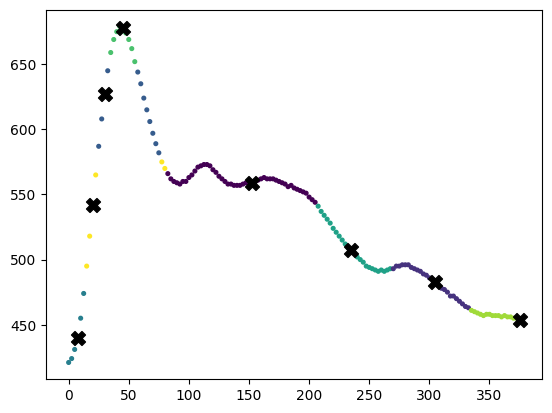

In [252]:


r,c = subclust3(data,0.5,0)


plt.figure()
plt.scatter(data[:,1],data[:,0], c=r, s=7)
plt.scatter(c[:,1],c[:,0], marker='X',s=100,c="black")
plt.show()